In [46]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [47]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Pre-Processing

In [48]:
df = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [49]:
df = pd.get_dummies(df,drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,NaN,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [50]:
df.dropna(inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
889,1,1,26.0,0,0,30.0000,1


# Holdout method

In [51]:
X = df.loc[:,['Pclass','Age','SibSp','Parch','Fare','Sex_male']]
y = df.loc[:,'Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male
325,1,36.0,0,0,135.6333,0
146,3,27.0,0,0,7.7958,1
691,3,4.0,0,1,13.4167,0
548,3,33.0,1,1,20.5250,1
288,2,42.0,0,0,13.0000,1
...,...,...,...,...,...,...
684,2,60.0,1,1,39.0000,1
148,2,36.5,0,2,26.0000,1
90,3,29.0,0,0,8.0500,1
819,3,10.0,3,2,27.9000,1


# Min Max Scaler Applied for k-Fold cross validation

In [52]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# CV function finding best Ks

In [55]:
def bestK(X_train,y_train,X_test,y_test):
    best_k = 0
    best_score = 0
    best_scores_array = []
    best_y_pred = []
    for i in range(1,20):
        clf = KNeighborsClassifier(n_neighbors=i, weights='uniform')
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'accuracy')
        y_pred = cross_val_predict(clf, X_test, y_test,cv=5)
        if scores.max() > best_score:
            best_k = i
            best_score = scores.max()
            best_scores_array = scores
            best_y_pred = y_pred
    return best_k,best_scores_array, best_y_pred

In [56]:
k, scores, y_pred = bestK(X_train,y_train,X_test,y_test)
print('Best K value: {}\nScore Array (k-fold cv):{}\nBest score: {}\nPrediction Array:\n{}'.format(k,scores,scores.max(),y_pred))

Best K value: 10
Score Array (k-fold cv):[0.86086957 0.75438596 0.78070175 0.80701754 0.83333333]
Best score: 0.8608695652173913
Prediction Array:
[0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]


# Classification result

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        79
           1       0.86      0.67      0.75        64

    accuracy                           0.80       143
   macro avg       0.82      0.79      0.80       143
weighted avg       0.81      0.80      0.80       143



<AxesSubplot:>

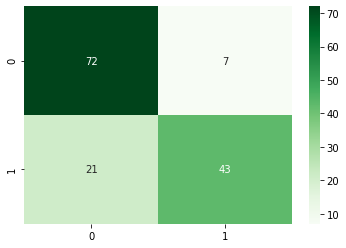

In [58]:
cfm = confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, annot=True, cmap="Greens", fmt = 'd')